In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

In [2]:

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200) # EdgeDetection
    return edges

def find_centers(edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    centers = []
    for contour in contours:
        if cv2.contourArea(contour) > 100:  
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                centers.append((cX, cY))
    return centers

def visualize_results(image, centers):
    for center in centers:
        cv2.circle(image, center, 5, (0, 255, 0), -1) 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



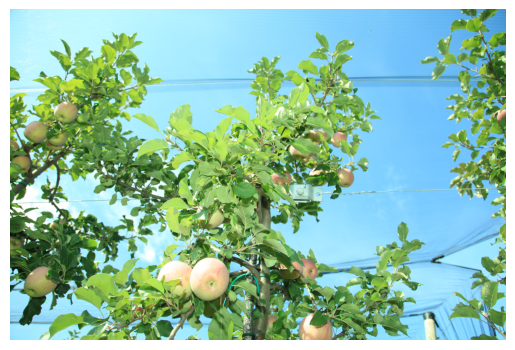

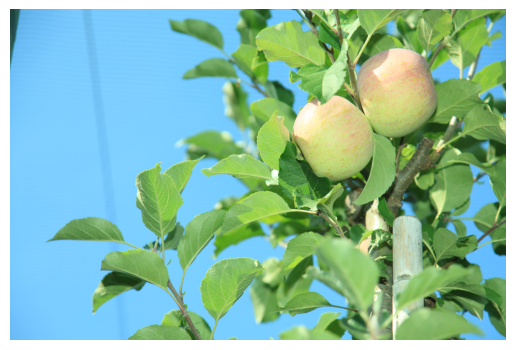

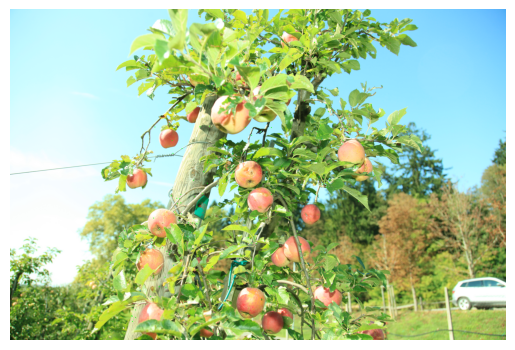

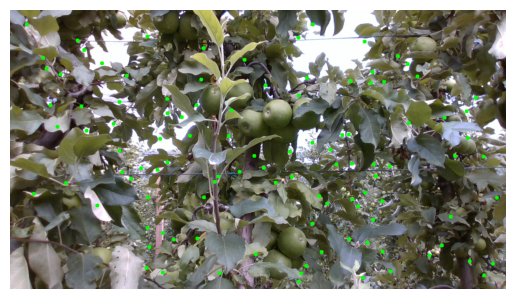

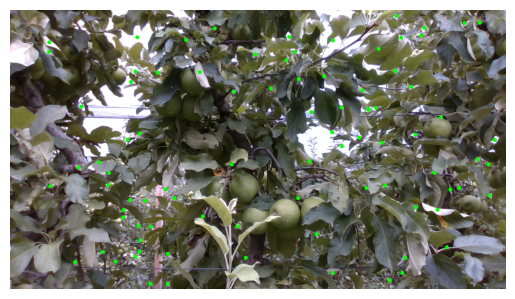

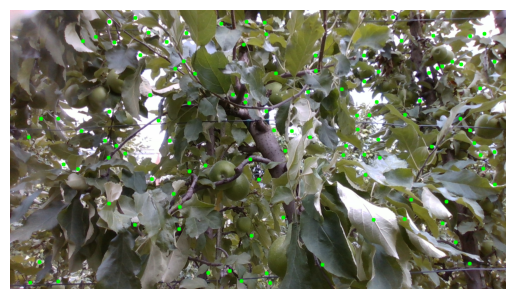

In [3]:
folder_path = 'sample_images/' 
images = load_images_from_folder(folder_path)

for img in images:
    edges = process_image(img)
    centers = find_centers(edges)
    visualize_results(img, centers)

In [4]:
import cv2

# Read images
img_hv_ls = cv2.imread('sample_images/images/3.JPG')
img_lv_hs = cv2.imread('sample_images/images/6.png')

# Calculate means in HSV color space
mean_hv_ls = cv2.mean(cv2.cvtColor(img_hv_ls, cv2.COLOR_BGR2HSV))
mean_lv_hs = cv2.mean(cv2.cvtColor(img_lv_hs, cv2.COLOR_BGR2HSV))

# Put information on images
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img_hv_ls, 'Mean brightness: ' + '{:.4f}'.format(mean_hv_ls[2]/255), (10, 30), font, 1, (0, 0, 0), 1)
cv2.putText(img_hv_ls, 'Mean saturation: ' + '{:.4f}'.format(mean_hv_ls[1]/255), (10, 60), font, 1, (0, 0, 0), 1)
cv2.putText(img_lv_hs, 'Mean brightness: ' + '{:.4f}'.format(mean_lv_hs[2]/255), (10, 30), font, 1, (255, 255, 255), 1)
cv2.putText(img_lv_hs, 'Mean saturation: ' + '{:.4f}'.format(mean_lv_hs[1]/255), (10, 60), font, 1, (255, 255, 255), 1)

cv2.imshow('High brightness, low saturation', img_hv_ls)
cv2.imshow('Low brightness, high saturation', img_lv_hs)
cv2.waitKey(0)
cv2.destroyAllWindows()